In [1]:
import pandas as pd

In [10]:
iris_df = pd.read_csv("Iris.csv", index_col = "Id")
iris_df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Handling Data Normalization


#### 1. Min-Max Normalization

    x_norm = (x - x_min) / (x_max - x_min)

In [13]:
min_length = iris_df.SepalLengthCm.min()
max_length = iris_df.SepalLengthCm.max()

norm_length = (iris_df.SepalLengthCm - min_length) / (max_length - min_length)
norm_length.describe()

count    150.000000
mean       0.428704
std        0.230018
min        0.000000
25%        0.222222
50%        0.416667
75%        0.583333
max        1.000000
Name: SepalLengthCm, dtype: float64

In [14]:
# Sklearn
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler()

norm_data = minmax_scale.fit_transform(iris_df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])


In [15]:
pd.DataFrame(norm_data, columns= ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


#### 2. Z-score Normalization / StandardScaler

    x_norm = (x - mean) / std

where x is the orginal value, mean and std are the mean and standard deviation of data.

In [16]:
mean_length = iris_df.SepalLengthCm.mean()
std_length = iris_df.SepalLengthCm.std()

In [18]:
norm_length = (iris_df.SepalLengthCm - mean_length ) / std_length
norm_length.describe()

count    1.500000e+02
mean    -5.684342e-16
std      1.000000e+00
min     -1.863780e+00
25%     -8.976739e-01
50%     -5.233076e-02
75%      6.722490e-01
max      2.483699e+00
Name: SepalLengthCm, dtype: float64

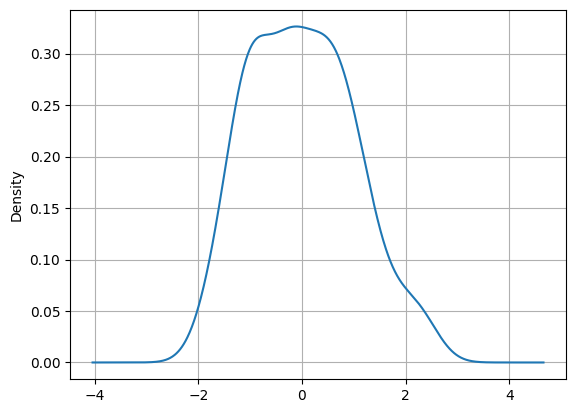

In [22]:
norm_length.plot.kde().grid() 

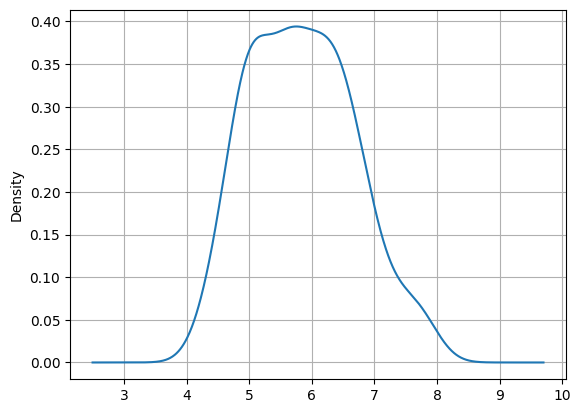

In [21]:
iris_df.SepalLengthCm.plot.kde().grid() # Orginal Dustributation

In [23]:
# sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
norm_data = scaler.fit_transform(iris_df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])



In [25]:
pd.DataFrame(norm_data, columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


#### 3. Log Transformation

        x_norm = log(x)
        
    Where X is the orginal value, x_norm is the normalized value.


In [26]:
import numpy as np
np.log(iris_df.SepalLengthCm).describe()

count    150.000000
mean       1.755393
std        0.141189
min        1.458615
25%        1.629241
50%        1.757858
75%        1.856298
max        2.066863
Name: SepalLengthCm, dtype: float64

In [28]:
np.log(iris_df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,1.629241,1.252763,0.336472,-1.609438
2,1.589235,1.098612,0.336472,-1.609438
3,1.547563,1.163151,0.262364,-1.609438
4,1.526056,1.131402,0.405465,-1.609438
5,1.609438,1.280934,0.336472,-1.609438
...,...,...,...,...
146,1.902108,1.098612,1.648659,0.832909
147,1.840550,0.916291,1.609438,0.641854
148,1.871802,1.098612,1.648659,0.693147


#### Power Transformation

    x_norm = sign(x) * abs(x) ** a

    

In [33]:
pow_factor = 0.8
norm_length = np.sign(iris_df.SepalLengthCm) * np.power(np.abs(iris_df.SepalLengthCm), pow_factor)

In [34]:
norm_length

Id
1      3.681766
2      3.565799
3      3.448882
4      3.390051
5      3.623898
         ...   
146    4.579941
147    4.359859
148    4.470238
149    4.304407
150    4.136963
Name: SepalLengthCm, Length: 150, dtype: float64

In [46]:
from scipy.stats import skewnorm

In [47]:
data = pd.DataFrame(skewnorm.rvs(10, size = 1000))

In [54]:
pow_transform = lambda data, pow_factor : np.sign(data) * np.power(np.abs(data), pow_factor)

<Axes: ylabel='Density'>

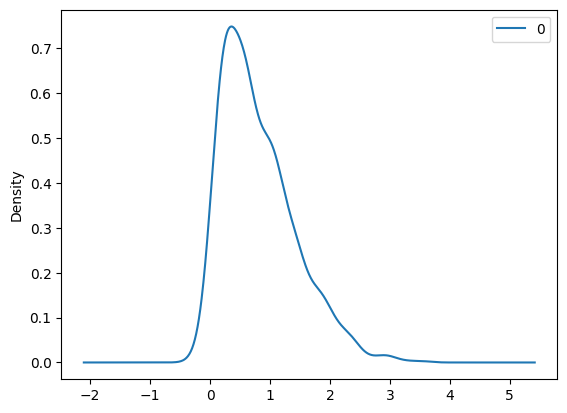

In [55]:
pd.DataFrame(data).plot.kde()

<Axes: ylabel='Density'>

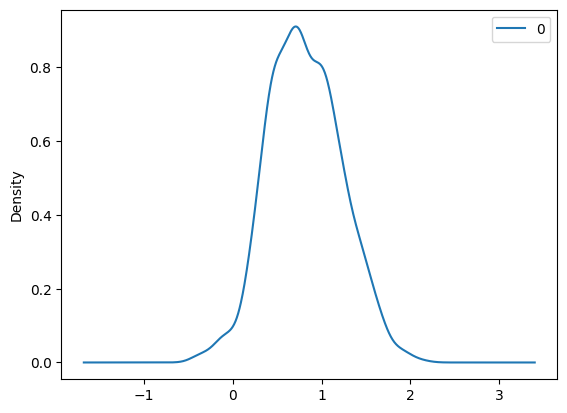

In [57]:
pow_transform(data, 0.6).plot.kde()